<a href="https://colab.research.google.com/github/quddaz/Unity_Project/blob/main/3%EC%9E%A5/3-2%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1573.98423528]


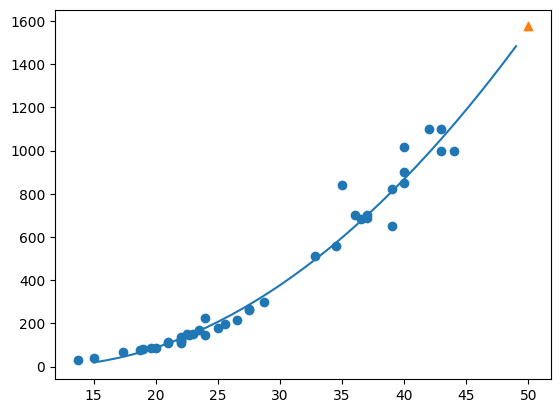

0.9706807451768623
0.9775935108325122


In [ ]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)


train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

# K-최근접 이웃 회귀 모델
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

'''
# 50cm 농어 예측해보기
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]])
plt.scatter(train_input, train_target)

plt.scatter(train_input[indexes], train_target[indexes], marker='D')

plt.scatter(50, 1033, marker='^')
plt.show()

- K-최근법 이웃의 한계
현재의 데이터보다 매우 크거나 작은 값을 가지면 예측이 불가능해진다.
'''
'''
선형 회귀
  대표적인 회귀 알고리즘
  특성이 하나의 경우 직선을 학습하는 알고리즘
'''
# 선형 회귀 훈련
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

'''
lr.fit(train_input,train_target)

print(lr.predict([[50]]))
# print = [1241.83860323]


# 학습한 직선 그리기
plt.scatter(train_input, train_target)

plt.plot([15,50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50, 1241.8, marker='^')
plt.show()

print(lr.score(train_input, train_target))
# 93%
print(lr.score(test_input, test_target))
# 82%
# 훈련 데이터와 테스트 데이터 사이의 갭이 너무 큰 과소적합 문제 발생
'''


#input에 제곱을 하여 2차원 그래프로 만들기
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

lr.fit(train_poly, train_target)

print(lr.predict([[50**2,50]]))
# print = [1573.98423528]

point = np.arange(15, 50)

plt.scatter(train_input, train_target)

plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

plt.scatter([50], [1574], marker='^')
plt.show()

print(lr.score(train_poly, train_target))
# 97%
print(lr.score(test_poly, test_target))
# 97.7%
# 테스트 데이터가 더 높아 과소적합
# 과대적합의 조건을 통해 적합도를 늘리면 된다.
# 항을 늘려보자

